## SCRAPING DATA

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/{airline}/page/{page}/"

In [ ]:
reviews = []

In [ ]:
airline = "british-airways"  # Example: Air India
pages_to_scrape = 391

In [ ]:
for page in range(1, pages_to_scrape + 1):
    url = base_url.format(airline=airline, page=page)
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to retrieve page {page}. HTTP Status Code: {response.status_code}")
        continue

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find review blocks
    review_blocks = soup.find_all('div', class_='text_content')

    if not review_blocks:
        print(f"No reviews found on page {page}.")
        continue

    for block in review_blocks:
        # Extract review content
        content = block.text.strip() if block else None

        # Append data to the list
        reviews.append({
            'Content': content
        })

In [ ]:
# Save data to a CSV file
df = pd.DataFrame(reviews)
df.to_csv(f"{airline}_reviews.csv", index=False)

In [ ]:
print(f"Scraped {len(reviews)} reviews for {airline}!")

Scraped 3908 reviews for british-airways!


In [ ]:
 df = pd.read_csv('/content/british-airways_reviews.csv')
 df

,Content
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...
...,...
3903,Flew LHR - VIE return operated by bmi but BA a...
3904,LHR to HAM. Purser addresses all club passenge...
3905,My son who had worked for British Airways urge...
3906,London City-New York JFK via Shannon on A318 b...


## PRE-PROCESSING

In [ ]:
df['Content'].str.lower()
df

,Content
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...
...,...
3903,Flew LHR - VIE return operated by bmi but BA a...
3904,LHR to HAM. Purser addresses all club passenge...
3905,My son who had worked for British Airways urge...
3906,London City-New York JFK via Shannon on A318 b...


In [ ]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from string import punctuation
nltk.download('punkt')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
import re
def remove_username_links(Content):
  Content=re.sub('@[^\s]+','',Content)
  Content=re.sub('http[^\s]+','',Content)
  return Content
df['Content']=df['Content'].apply(remove_username_links)
df

,Content
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...
...,...
3903,Flew LHR - VIE return operated by bmi but BA a...
3904,LHR to HAM. Purser addresses all club passenge...
3905,My son who had worked for British Airways urge...
3906,London City-New York JFK via Shannon on A318 b...


In [ ]:
def token(text):
  token=re.split('W+',text)
  return token

df['review_token']=df['Content'].apply(lambda x:word_tokenize(x))

In [ ]:
stopwords=nltk.corpus.stopwords.words("english")
def remove_stopwords(text):
  out=[i for i in text if i not in stopwords]
  return out

df['review_stopwords']=df['review_token'].apply(lambda x:remove_stopwords(x))
df

,Content,review_token,review_stopwords
0,✅ Trip Verified | British airways lost bags ...,"[✅, Trip, Verified, |, British, airways, lost,...","[✅, Trip, Verified, |, British, airways, lost,..."
1,✅ Trip Verified | The check in process and rew...,"[✅, Trip, Verified, |, The, check, in, process...","[✅, Trip, Verified, |, The, check, process, re..."
2,"✅ Trip Verified | We flew in November 2023, ...","[✅, Trip, Verified, |, We, flew, in, November,...","[✅, Trip, Verified, |, We, flew, November, 202..."
3,✅ Trip Verified | I left for London from Johan...,"[✅, Trip, Verified, |, I, left, for, London, f...","[✅, Trip, Verified, |, I, left, London, Johann..."
4,✅ Trip Verified | After an excellent flight ...,"[✅, Trip, Verified, |, After, an, excellent, f...","[✅, Trip, Verified, |, After, excellent, fligh..."
...,...,...,...
3903,Flew LHR - VIE return operated by bmi but BA a...,"[Flew, LHR, -, VIE, return, operated, by, bmi,...","[Flew, LHR, -, VIE, return, operated, bmi, BA,..."
3904,LHR to HAM. Purser addresses all club passenge...,"[LHR, to, HAM, ., Purser, addresses, all, club...","[LHR, HAM, ., Purser, addresses, club, passeng..."
3905,My son who had worked for British Airways urge...,"[My, son, who, had, worked, for, British, Airw...","[My, son, worked, British, Airways, urged, fly..."
3906,London City-New York JFK via Shannon on A318 b...,"[London, City-New, York, JFK, via, Shannon, on...","[London, City-New, York, JFK, via, Shannon, A3..."


In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer=PorterStemmer()
def stemming(text):
  stem_text=[porter_stemmer.stem(word) for word in text]
  return stem_text

df['stemmed_review']=df['review_stopwords'].apply(lambda x:stemming(x))
df

,Content,review_token,review_stopwords,stemmed_review
0,✅ Trip Verified | British airways lost bags ...,"[✅, Trip, Verified, |, British, airways, lost,...","[✅, Trip, Verified, |, British, airways, lost,...","[✅, trip, verifi, |, british, airway, lost, ba..."
1,✅ Trip Verified | The check in process and rew...,"[✅, Trip, Verified, |, The, check, in, process...","[✅, Trip, Verified, |, The, check, process, re...","[✅, trip, verifi, |, the, check, process, rewa..."
2,"✅ Trip Verified | We flew in November 2023, ...","[✅, Trip, Verified, |, We, flew, in, November,...","[✅, Trip, Verified, |, We, flew, November, 202...","[✅, trip, verifi, |, we, flew, novemb, 2023, ,..."
3,✅ Trip Verified | I left for London from Johan...,"[✅, Trip, Verified, |, I, left, for, London, f...","[✅, Trip, Verified, |, I, left, London, Johann...","[✅, trip, verifi, |, i, left, london, johannes..."
4,✅ Trip Verified | After an excellent flight ...,"[✅, Trip, Verified, |, After, an, excellent, f...","[✅, Trip, Verified, |, After, excellent, fligh...","[✅, trip, verifi, |, after, excel, flight, 777..."
...,...,...,...,...
3903,Flew LHR - VIE return operated by bmi but BA a...,"[Flew, LHR, -, VIE, return, operated, by, bmi,...","[Flew, LHR, -, VIE, return, operated, bmi, BA,...","[flew, lhr, -, vie, return, oper, bmi, ba, air..."
3904,LHR to HAM. Purser addresses all club passenge...,"[LHR, to, HAM, ., Purser, addresses, all, club...","[LHR, HAM, ., Purser, addresses, club, passeng...","[lhr, ham, ., purser, address, club, passeng, ..."
3905,My son who had worked for British Airways urge...,"[My, son, who, had, worked, for, British, Airw...","[My, son, worked, British, Airways, urged, fly...","[my, son, work, british, airway, urg, fli, bri..."
3906,London City-New York JFK via Shannon on A318 b...,"[London, City-New, York, JFK, via, Shannon, on...","[London, City-New, York, JFK, via, Shannon, A3...","[london, city-new, york, jfk, via, shannon, a3..."


In [ ]:
word_net_leme=WordNetLemmatizer()
def lemme(text):
  lemme_text=[word_net_leme.lemmatize(word) for word in text]
  return lemme_text

df['lemmetization']=df['stemmed_review'].apply(lambda x:lemme(x))
df

,Content,review_token,review_stopwords,stemmed_review,lemmetization
0,✅ Trip Verified | British airways lost bags ...,"[✅, Trip, Verified, |, British, airways, lost,...","[✅, Trip, Verified, |, British, airways, lost,...","[✅, trip, verifi, |, british, airway, lost, ba...","[✅, trip, verifi, |, british, airway, lost, ba..."
1,✅ Trip Verified | The check in process and rew...,"[✅, Trip, Verified, |, The, check, in, process...","[✅, Trip, Verified, |, The, check, process, re...","[✅, trip, verifi, |, the, check, process, rewa...","[✅, trip, verifi, |, the, check, process, rewa..."
2,"✅ Trip Verified | We flew in November 2023, ...","[✅, Trip, Verified, |, We, flew, in, November,...","[✅, Trip, Verified, |, We, flew, November, 202...","[✅, trip, verifi, |, we, flew, novemb, 2023, ,...","[✅, trip, verifi, |, we, flew, novemb, 2023, ,..."
3,✅ Trip Verified | I left for London from Johan...,"[✅, Trip, Verified, |, I, left, for, London, f...","[✅, Trip, Verified, |, I, left, London, Johann...","[✅, trip, verifi, |, i, left, london, johannes...","[✅, trip, verifi, |, i, left, london, johannes..."
4,✅ Trip Verified | After an excellent flight ...,"[✅, Trip, Verified, |, After, an, excellent, f...","[✅, Trip, Verified, |, After, excellent, fligh...","[✅, trip, verifi, |, after, excel, flight, 777...","[✅, trip, verifi, |, after, excel, flight, 777..."
...,...,...,...,...,...
3903,Flew LHR - VIE return operated by bmi but BA a...,"[Flew, LHR, -, VIE, return, operated, by, bmi,...","[Flew, LHR, -, VIE, return, operated, bmi, BA,...","[flew, lhr, -, vie, return, oper, bmi, ba, air...","[flew, lhr, -, vie, return, oper, bmi, ba, air..."
3904,LHR to HAM. Purser addresses all club passenge...,"[LHR, to, HAM, ., Purser, addresses, all, club...","[LHR, HAM, ., Purser, addresses, club, passeng...","[lhr, ham, ., purser, address, club, passeng, ...","[lhr, ham, ., purser, address, club, passeng, ..."
3905,My son who had worked for British Airways urge...,"[My, son, who, had, worked, for, British, Airw...","[My, son, worked, British, Airways, urged, fly...","[my, son, work, british, airway, urg, fli, bri...","[my, son, work, british, airway, urg, fli, bri..."
3906,London City-New York JFK via Shannon on A318 b...,"[London, City-New, York, JFK, via, Shannon, on...","[London, City-New, York, JFK, via, Shannon, A3...","[london, city-new, york, jfk, via, shannon, a3...","[london, city-new, york, jfk, via, shannon, a3..."


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['Sentiment_Score'] = df['Content'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Sentiment'] = df['Sentiment_Score'].apply(classify_sentiment)


In [ ]:
df.to_csv('british_airways_sentiment.csv', index=False)


## VISUALIZATION - ANALYSIS

### SENTIMENT DISTRIBUTION

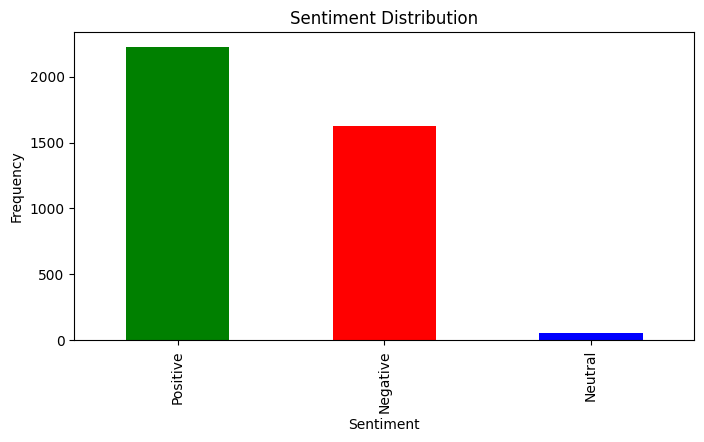

In [ ]:
import matplotlib.pyplot as plt
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'], figsize=(8, 4))
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


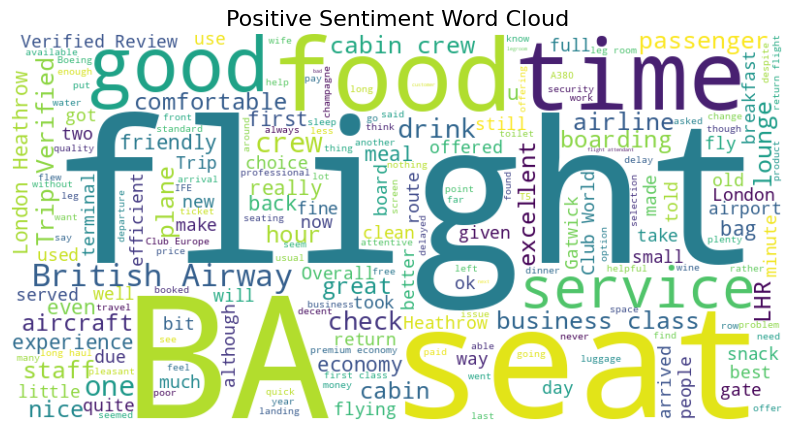

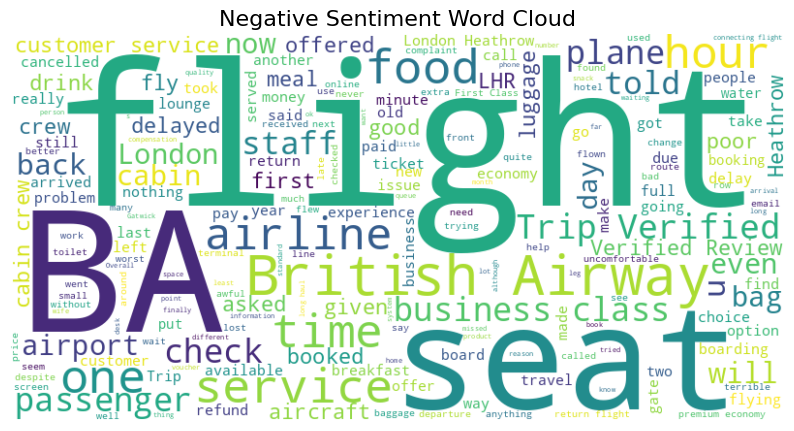

In [82]:
from wordcloud import WordCloud

# Filter reviews
positive_reviews = df[df['Sentiment'] == 'Positive']['Content']
negative_reviews = df[df['Sentiment'] == 'Negative']['Content']

# Generate word clouds
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Plot positive word cloud
plt.figure(figsize=(10, 6))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_text), interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

# Plot negative word cloud
plt.figure(figsize=(10, 6))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_text), interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud', fontsize=16)
plt.axis('off')
plt.show()


### TOPIC ANALYSIS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['lemmetization'].apply(lambda x: ' '.join(x)))

In [ ]:
print(f"Top features: {vectorizer.get_feature_names_out()[:50]}")

Top features: ['00' '000' '0058' '00am' '00pm' '01' '03' '03a' '04' '04a' '05' '05pm'
 '06' '0600' '07' '08' '09' '10' '100' '1000' '10000' '101' '105' '10a'
 '10am' '10b' '10hr' '10pm' '10th' '11' '110' '1100' '113' '116' '11a'
 '11am' '11b' '11f' '11pm' '11th' '12' '120' '1200' '122' '12a' '12d'
 '12f' '12h' '12hr' '12th']


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=20, random_state=42)

In [ ]:
for index, topic in enumerate(lda.components_):
    print(f"Topic {index+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['comfort', 'lhr', 'busi', 'flight', 'seat', 'cabin', 'class', 'crew', 'food', 'good']
Topic 2:
['trip', 'book', 'voucher', 'airlin', 'refund', 'british', 'airway', 'flight', 'ba', 'travel']
Topic 3:
['verifi', 'trip', 'food', 'rest', 'class', 'work', 'busi', 'screen', 'flight', 'seat']
Topic 4:
['london', 'day', 'return', 'check', 'seat', 'cancel', 'told', 'ba', 'book', 'flight']
Topic 5:
['cabin', 'toilet', 'leg', 'club', 'food', 'class', 'busi', 'flight', 'ba', 'seat']
Topic 6:
['time', 'london', 'crew', 'cabin', 'economi', 'food', 'good', 'ba', 'seat', 'flight']
Topic 7:
['airlin', 'use', 'book', 'time', 'custom', 'servic', 'airway', 'british', 'ba', 'flight']
Topic 8:
['seat', 'british', 'heathrow', 'return', 'drink', 'servic', 'crew', 'good', 'time', 'flight']
Topic 9:
['airlin', 'food', 'airway', 'british', 'economi', 'ba', 'flight', 'busi', 'class', 'seat']
Topic 10:
['trip', 'toronto', 'staff', 'verifi', 'heathrow', 'suitcas', 'british', 'airway', 'flight', 'london']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


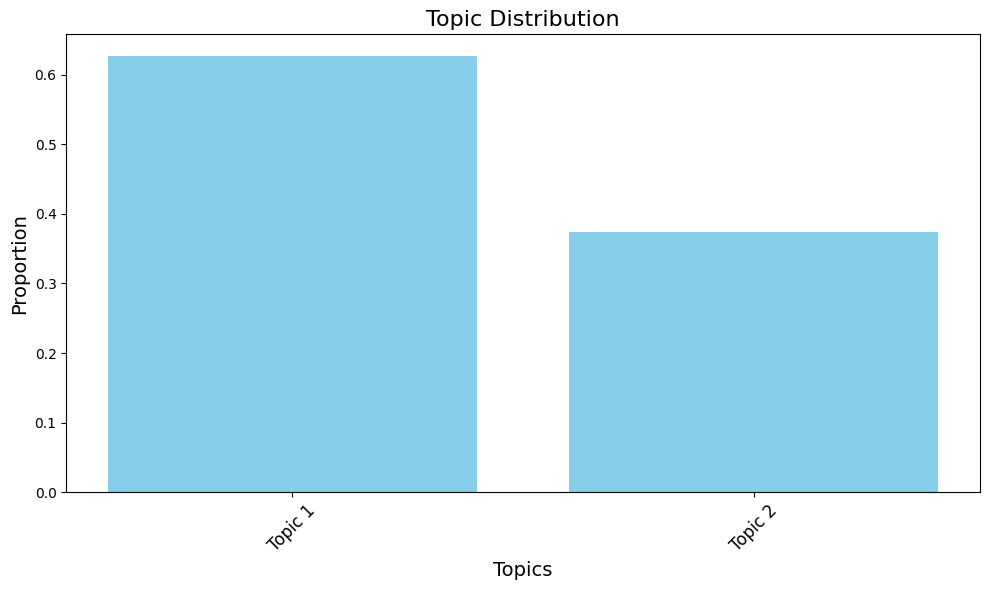

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get topic weights for each document
doc_topic_matrix = lda.transform(dtm)

# Sum the weights for each topic
topic_weights = np.sum(doc_topic_matrix, axis=0)

# Normalize the topic weights
topic_weights_normalized = topic_weights / topic_weights.sum()

# Plot the topic distribution
topics = [f"Topic {i+1}" for i in range(len(topic_weights))]
plt.figure(figsize=(10, 6))
plt.bar(topics, topic_weights_normalized, color='skyblue')
plt.title('Topic Distribution', fontsize=16)
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


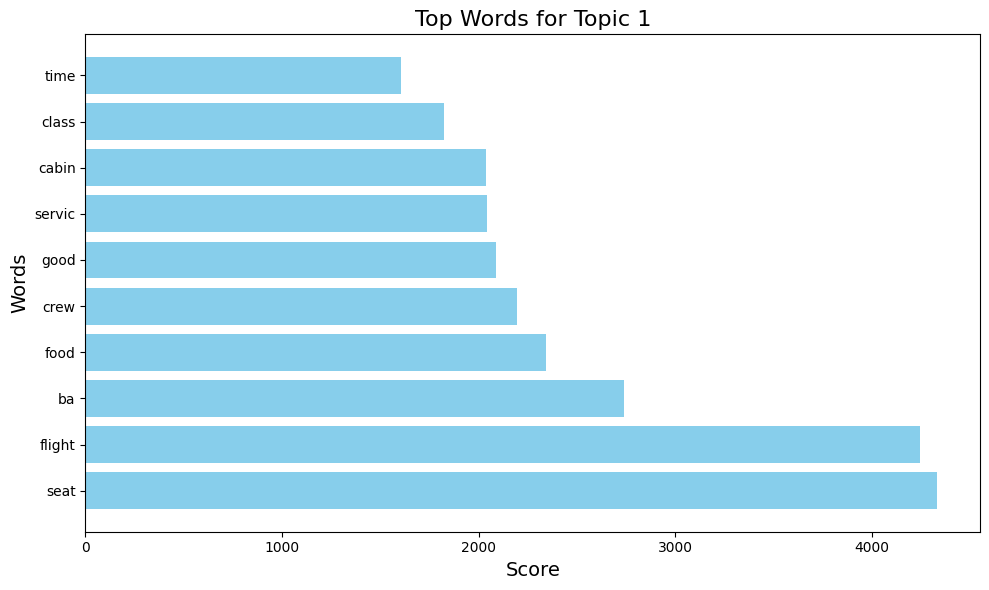

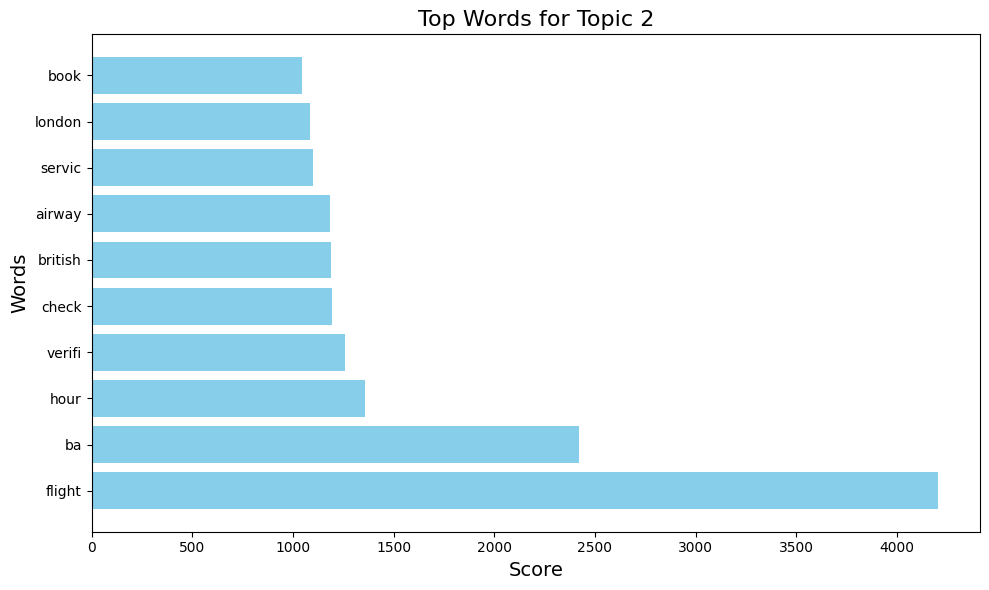

In [ ]:
# Extract top words for each topic
num_top_words = 10
topic_word_data = []

for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-num_top_words:]]
    top_scores = [topic[i] for i in topic.argsort()[-num_top_words:]]
    topic_word_data.append((f"Topic {index+1}", top_words, top_scores))

# Plot top words for each topic
for topic_label, top_words, top_scores in topic_word_data:
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_scores, color='skyblue')
    plt.title(f'Top Words for {topic_label}', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


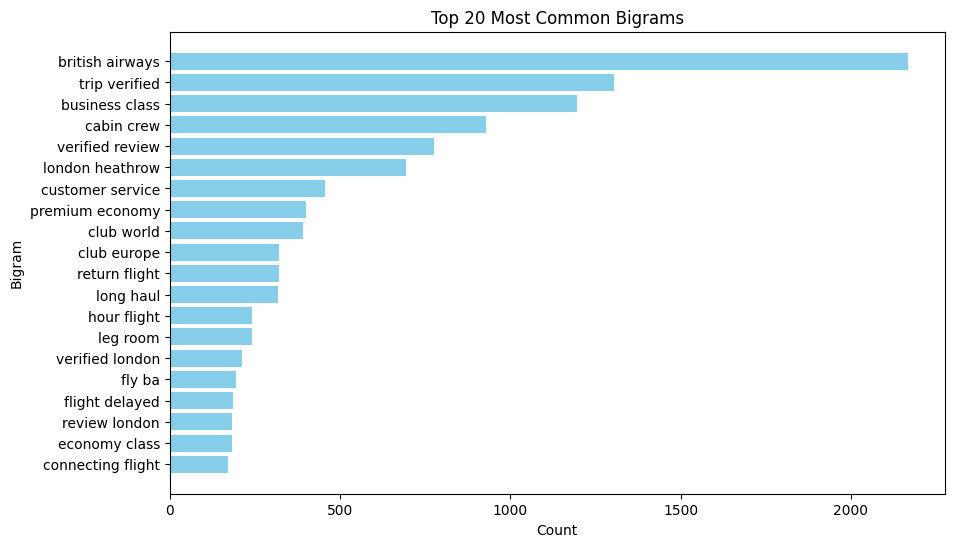

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

# Generate bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = vectorizer.fit_transform(df['Content'])

# Get top bigrams
bigram_counts = bigram_matrix.sum(axis=0).A1
bigram_features = vectorizer.get_feature_names_out()
top_bigrams = pd.DataFrame({'Bigram': bigram_features, 'Count': bigram_counts}).nlargest(20, 'Count')

# Plot top bigrams
plt.figure(figsize=(10, 6))
plt.barh(top_bigrams['Bigram'], top_bigrams['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Top 20 Most Common Bigrams')
plt.gca().invert_yaxis()
plt.show()


TOPIC WISE SENTIMENT ANALYSIS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


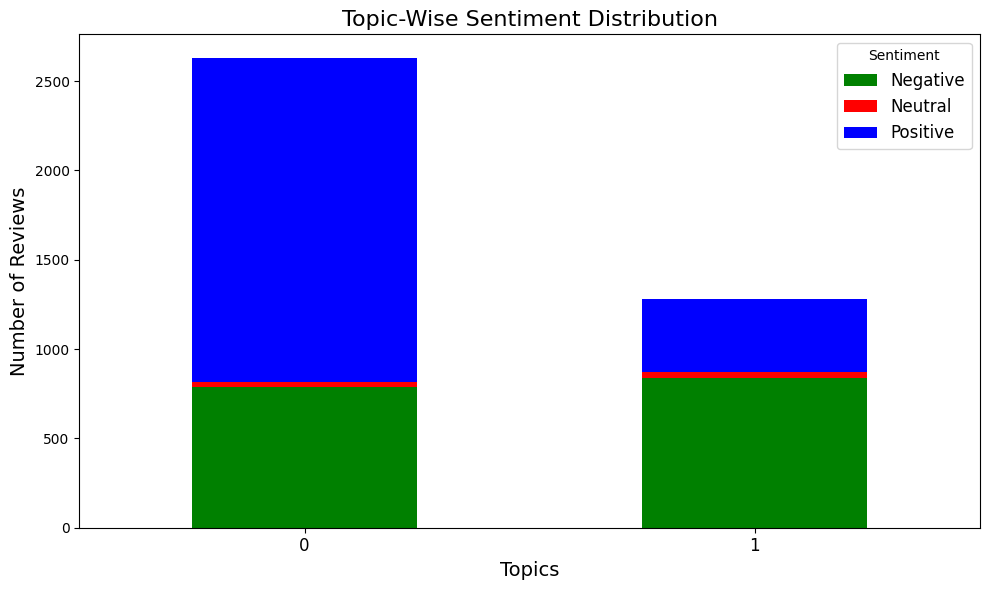

In [ ]:
import numpy as np

# Assign topics to reviews based on the highest topic weight
df['Assigned_Topic'] = np.argmax(doc_topic_matrix, axis=1)

# Group by topic and sentiment
topic_sentiment = df.groupby(['Assigned_Topic', 'Sentiment']).size().unstack()

# Plot topic-wise sentiment
topic_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red', 'blue'])
plt.title('Topic-Wise Sentiment Distribution', fontsize=16)
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-83-c05457954f40>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_sentiment = df.groupby('Length_Category')['Sentiment_Score'].mean()


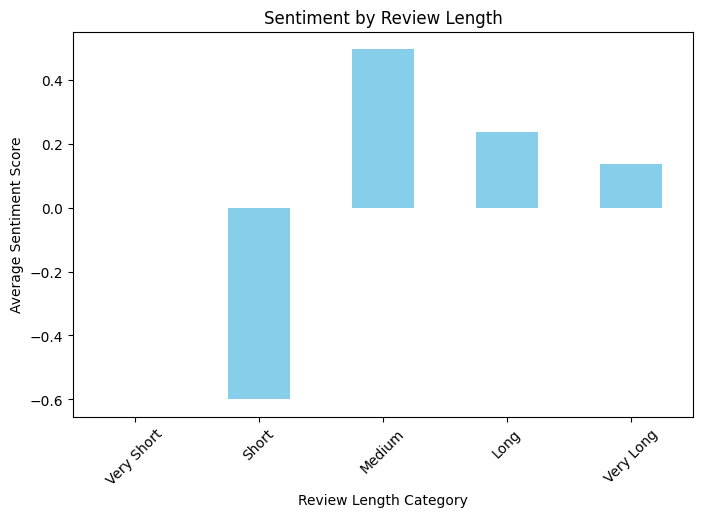

In [83]:
# Calculate review lengths
df['Review_Length'] = df['Content'].apply(len)

# Group by review length bins
bins = [0, 50, 100, 200, 500, 1000]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
df['Length_Category'] = pd.cut(df['Review_Length'], bins=bins, labels=labels)

# Average sentiment by review length
length_sentiment = df.groupby('Length_Category')['Sentiment_Score'].mean()

# Plot sentiment by review length
length_sentiment.plot(kind='bar', figsize=(8, 5), color='skyblue', title='Sentiment by Review Length')
plt.xlabel('Review Length Category')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


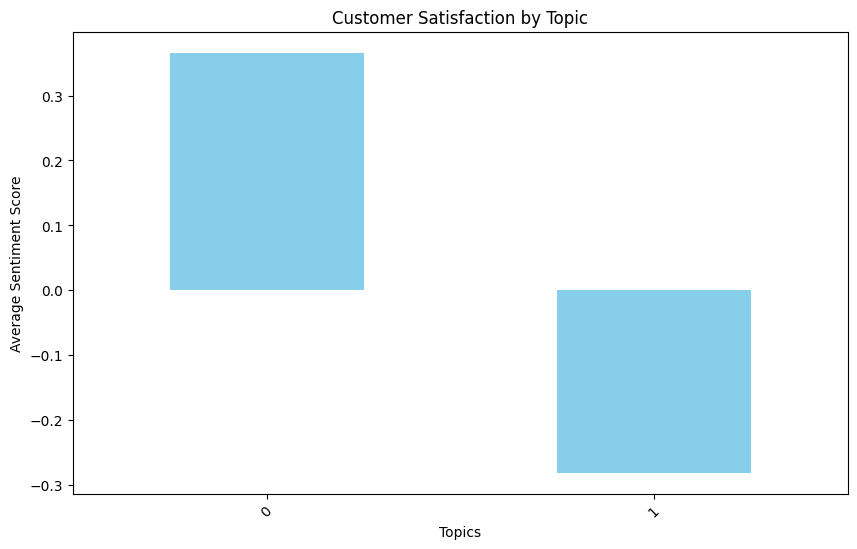

In [84]:
# Group sentiment by topic
topic_satisfaction = df.groupby('Assigned_Topic')['Sentiment_Score'].mean()

# Plot topic-wise satisfaction
topic_satisfaction.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Customer Satisfaction by Topic')
plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


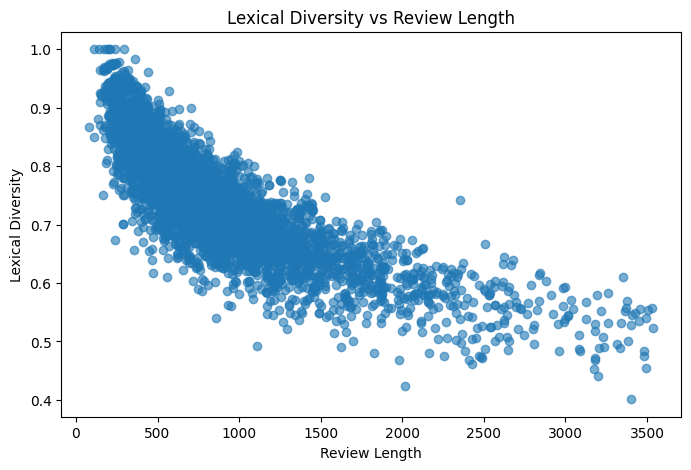

In [85]:
# Calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

df['Lexical_Diversity'] = df['Content'].apply(lexical_diversity)

# Plot review quality metrics
df['Review_Length'] = df['Content'].apply(len)

plt.figure(figsize=(8, 5))
plt.scatter(df['Review_Length'], df['Lexical_Diversity'], alpha=0.6)
plt.title('Lexical Diversity vs Review Length')
plt.xlabel('Review Length')
plt.ylabel('Lexical Diversity')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


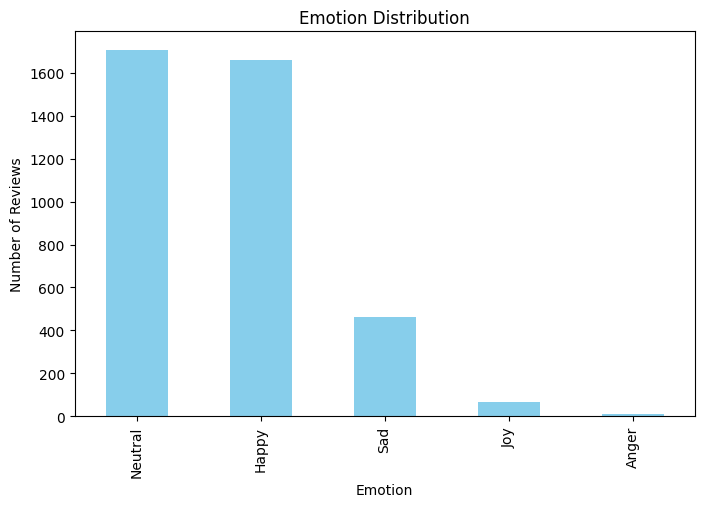

In [86]:
from textblob import TextBlob

# Add emotion tags based on polarity
def detect_emotion(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.5:
        return 'Joy'
    elif polarity > 0.1:
        return 'Happy'
    elif polarity < -0.5:
        return 'Anger'
    elif polarity < -0.1:
        return 'Sad'
    else:
        return 'Neutral'

df['Emotion'] = df['Content'].apply(detect_emotion)

# Plot emotion distribution
df['Emotion'].value_counts().plot(kind='bar', figsize=(8, 5), color='skyblue', title='Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Number of Reviews')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


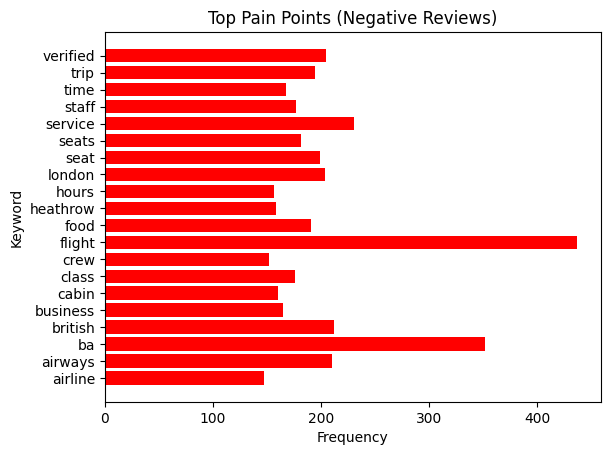

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter negative reviews
negative_reviews = df[df['Sentiment'] == 'Negative']['Content']

# Extract keywords
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(negative_reviews)
keywords = vectorizer.get_feature_names_out()

# Plot top pain points
keyword_counts = X.sum(axis=0).A1
plt.barh(keywords, keyword_counts, color='red')
plt.title('Top Pain Points (Negative Reviews)')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()
